# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


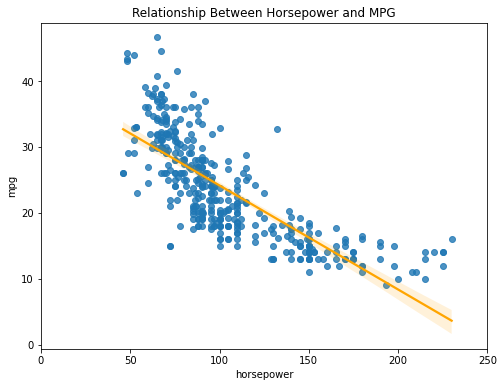

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
call_on_students(1)

['Alvaro']


#### Answer: 

- Graph of loss function/cost function for linear regression
- Can help us describe gradient descent


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
call_on_students(1)

['Stephanie']


- Start by taking a guess
- Take steps down the gradient to find our global minimum
- Move in the opposite direction of the gradient
- Take multiple steps until we get close to a gradient of 0 (minimum)
- Using partial derivatives to find gradient
- Slope of tangent of the cost function

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
call_on_students(1)

['Vlad']


#### Answer: 

- step size is the distance we move down the cost function for each step
- learning rate effects the number of steps we need to take, higher learning rate means less steps (bigger steps) smaller learning rate = more steps (smaller steps)
- step size is proportional to the size of the gradient at our current estimate
- learning rate is the proportion of the gradient we use to calculate step size
- step size changes, gets smaller as we get closer to our minimum, by design
- too large of a step size: over shoot, bounce over our minimum
- too small of a step size: it will take us too long, too many steps, to reach the minimum


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
call_on_students(1)

['Max']


#### Answer: 

- categorical target (ie Classification)
- probability of the classes, via the log-odds and logit/sigmoid
- lr predicts continous values, logistic is bound by 0 and 1
- parametric model, uses linear equation so it has betas (aka coefficients/weights = parameters)
- y = b0 + x1b1 + x2b2 + x3b3


Bonus: When would we considering using a non-parametric model over logistic regression?

- features are not linear with our target
- high dimensionality data, sparse data (lots of 0s and 1s)

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
call_on_students(1)

['Luke']


#### Answer: 

- In comparison to decision tree
- More granular predict_proba method, can be more insightful/inferential
- Have direct intrepretion of our coefficients
- won't work as well high dimensionality data, sparse data (lots of 0s and 1s)
- less prone to overfitting because it incorporates regularization by default (l2 norm)
- In comparison to some other models, it won't handle a class imbalance very well 

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
call_on_students(1)

['Gideon']


In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns='target')
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
call_on_students(1)

['']


#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y.value_counts()

0    293
1     99
Name: target, dtype: int64

In [18]:
y.value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

#### Answer:

- Lot more negatives than postives, class imbalance


In [19]:
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Predict the most common, always predict class 0


#### Part 3: How accurate would that baseline be on test data?


In [20]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- Model would be ~75% accurate based on the breakdown of our testing y values, misleading high score


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [21]:
call_on_students(1)

['Clara']


#### Answer:

- Model, when training, isn't seeing enough data from our minority class to predict it well. Fitting to majority class more
- SMOTE: synthetic minority oversampling technique creates synthetic (artificial) datapoints to oversample the minority class. 
- Could also potentially undersample the majority (only if we have a ton of data)
- Instead of oversample or undersample we would use class_weights hyperparameter ('balanced') (most sklearn classifiers have this option available)


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [22]:
call_on_students(1)

['Shu']


In [23]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

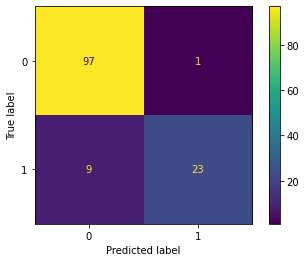

In [24]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [25]:
call_on_students(1)

['Hera']


In [26]:
y_pred_test = logreg.predict(X_test_scaled)

In [27]:
# Accuracy
accuracy_score(y_test, y_pred_test)

0.9230769230769231

In [28]:
# Precision
precision_score(y_test, y_pred_test)

0.9583333333333334

In [29]:
# Recall
recall_score(y_test, y_pred_test)

0.71875

In [30]:
# F1-Score
f1_score(y_test, y_pred_test)

0.8214285714285714

f1 score is the harmonic mean of the precision and recall score

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [31]:
call_on_students(1)

['Charlie']


In [32]:
y_pred_test_probs = logreg.predict_proba(X_test_scaled)
y_hat = y_pred_test_probs[:, 1]
y_hat

array([2.88211554e-03, 4.66577929e-03, 1.39110635e-04, 2.30040460e-03,
       3.65481656e-04, 9.56382448e-04, 9.97200959e-01, 9.73103080e-04,
       6.66636668e-02, 5.35778541e-04, 9.91065029e-01, 4.28371664e-02,
       8.45390051e-01, 1.36124411e-03, 8.81698888e-02, 3.13933548e-04,
       6.03042137e-02, 2.65313401e-04, 5.78978925e-04, 5.24607746e-04,
       1.25332049e-01, 7.61806157e-05, 8.57600530e-05, 8.67061834e-01,
       6.10344912e-04, 3.70596692e-03, 3.16963718e-02, 3.55067473e-01,
       7.97034531e-04, 8.03000867e-03, 9.47397282e-01, 2.14512246e-02,
       2.14283145e-01, 5.59151712e-04, 9.81588597e-01, 6.04199292e-05,
       9.65393863e-01, 2.39633260e-03, 9.66323397e-01, 9.99312202e-01,
       9.25243170e-01, 1.12718485e-03, 5.35187366e-05, 1.74465054e-03,
       9.67079081e-01, 9.98817896e-01, 2.81251779e-01, 1.54823217e-04,
       3.73172409e-03, 3.01269772e-04, 9.81312227e-01, 9.71495990e-03,
       7.19653335e-03, 1.70555661e-04, 4.01109500e-03, 3.35217499e-01,
      

In [65]:
y_pred_test_probs

array([[9.97117884e-01, 2.88211554e-03],
       [9.95334221e-01, 4.66577929e-03],
       [9.99860889e-01, 1.39110635e-04],
       [9.97699595e-01, 2.30040460e-03],
       [9.99634518e-01, 3.65481656e-04],
       [9.99043618e-01, 9.56382448e-04],
       [2.79904115e-03, 9.97200959e-01],
       [9.99026897e-01, 9.73103080e-04],
       [9.33336333e-01, 6.66636668e-02],
       [9.99464221e-01, 5.35778541e-04],
       [8.93497133e-03, 9.91065029e-01],
       [9.57162834e-01, 4.28371664e-02],
       [1.54609949e-01, 8.45390051e-01],
       [9.98638756e-01, 1.36124411e-03],
       [9.11830111e-01, 8.81698888e-02],
       [9.99686066e-01, 3.13933548e-04],
       [9.39695786e-01, 6.03042137e-02],
       [9.99734687e-01, 2.65313401e-04],
       [9.99421021e-01, 5.78978925e-04],
       [9.99475392e-01, 5.24607746e-04],
       [8.74667951e-01, 1.25332049e-01],
       [9.99923819e-01, 7.61806157e-05],
       [9.99914240e-01, 8.57600530e-05],
       [1.32938166e-01, 8.67061834e-01],
       [9.993896

In [33]:
y_hat_0 = y_pred_test_probs[:,0]

In [34]:
# Calculate roc-auc
y_pred_test_probs = logreg.predict_proba(X_test_scaled)
s0 = roc_auc_score(y_test, y_hat_0)

In [35]:
y_pred_test_probs = logreg.predict_proba(X_test_scaled)
s1 = roc_auc_score(y_test, y_hat)

In [36]:
s1 + s0

1.0

auc = how likely we are to predict both classes

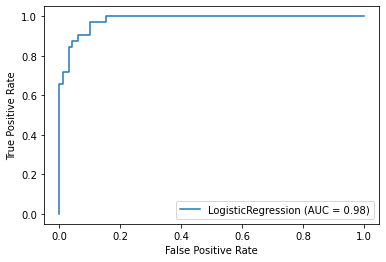

In [37]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [40]:
call_on_students(1)

['Keanan']


In [41]:
logreg.score(X_train_scaled, y_train)

0.950381679389313

In [42]:
accuracy_score(y_test, y_pred_test)

0.9230769230769231

#### Answer:

- Doing pretty good, precision is higher than recall, more false negatives than false positives, doing better at predicting the negative class
- testing score slightly lower than training, just a bit overfit


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [43]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

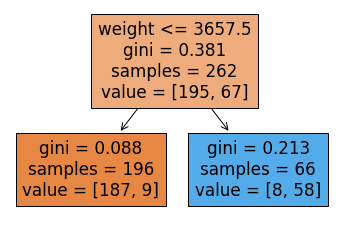

In [44]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

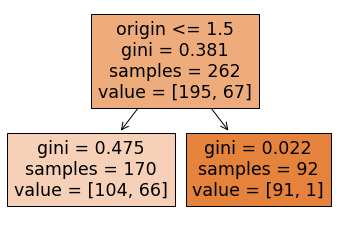

In [45]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [46]:
call_on_students(1)

['JD']


#### Answer:

- The first tree, splitting on weight. Produces the better split, more pure nodes
- Looking at gini scores for both child nodes, first tree is lower gini score, hence more pure


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [47]:
call_on_students(1)

['Mahum']


In [48]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

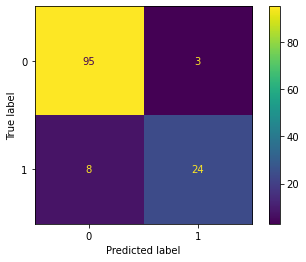

In [49]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test);

In [50]:
dt_sc = DecisionTreeClassifier(random_state=42)
dt_sc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
dt_sc.score(X_train_scaled, y_train)

1.0

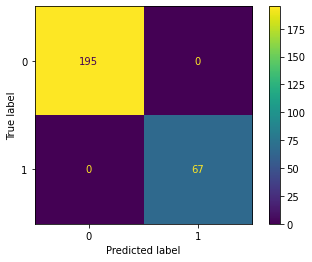

In [52]:
plot_confusion_matrix(dt_sc, X_train_scaled, y_train);

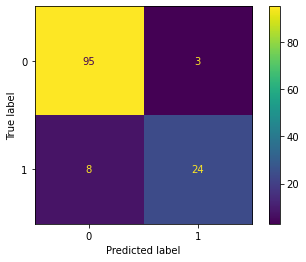

In [53]:
plot_confusion_matrix(dt_sc, X_test_scaled, y_test);

In [54]:
dt_sc.get_depth()

7

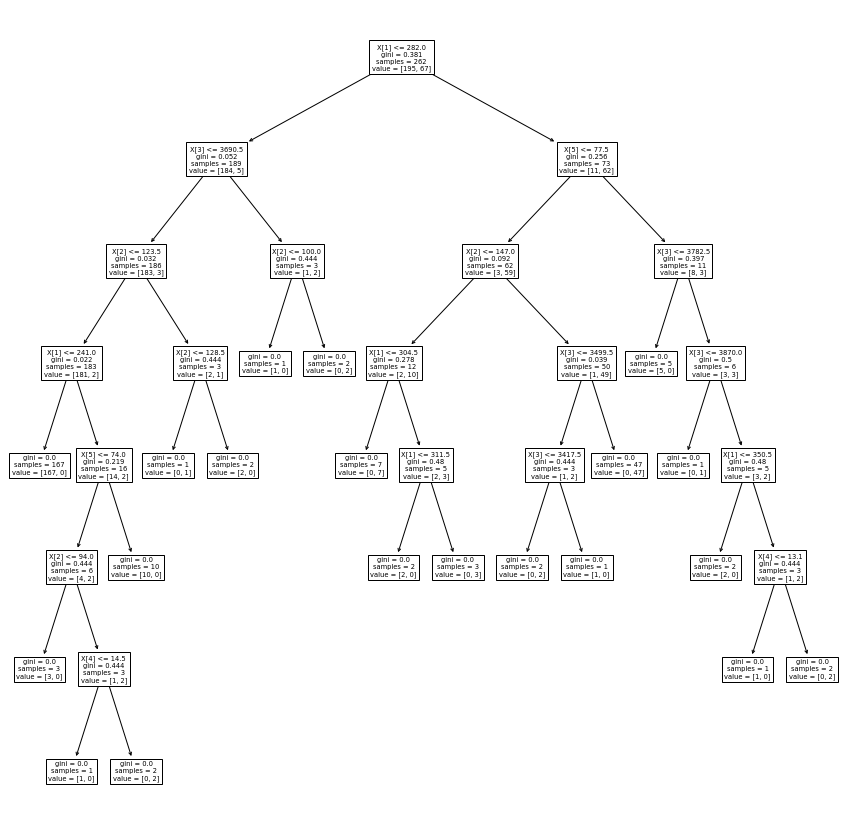

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
plot_tree(dt, ax =ax);

In [56]:
dt_tuned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42)

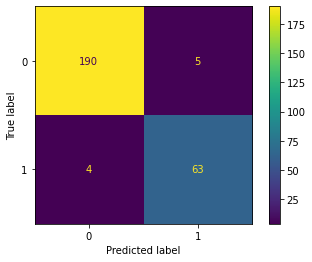

In [57]:
plot_confusion_matrix(dt_tuned, X_train, y_train);

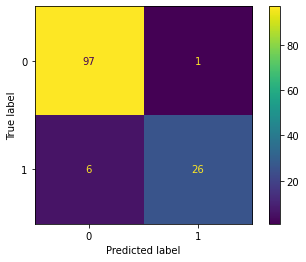

In [58]:
plot_confusion_matrix(dt_tuned, X_test, y_test);

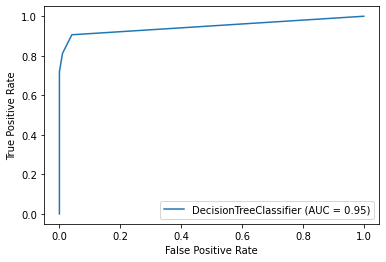

In [59]:
plot_roc_curve(dt_tuned, X_test, y_test);

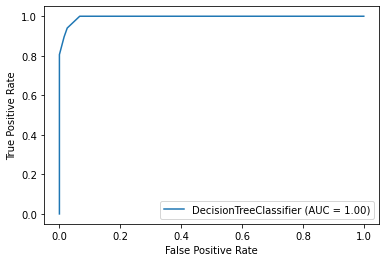

In [60]:
plot_roc_curve(dt_tuned, X_train, y_train);

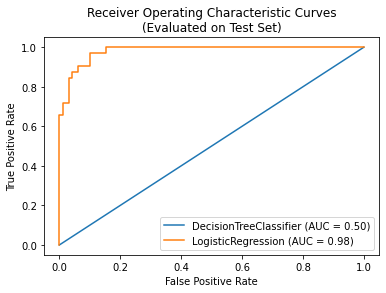

In [61]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [62]:
call_on_students(1)

['Kevin']


#### Answer:

- Logistic regression is the better model, higher AUC score!
